In [1]:
import numpy as np 
import pandas as pd 
#Importing the dataframe of the boroughs in Barcelona
df = pd.read_html('https://es.wikipedia.org/wiki/Distritos_de_Barcelona')[0]


In [2]:
df

,Nº,Distrito,Imagen,Superficie km²[1]​,Población (2019)[2]​,Densidad hab/km²,Barrios (nº),Regidor
0,1,Ciutat Vella,NaN,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet...",Jordi Rabassa (Barcelona en Comú)
1,2,Eixample,NaN,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",Jordi Martí (Barcelona en Comú)
2,3,Sants-Montjuïc,NaN,2268,184 091,811832,"Poble Sec (11), La Marina del Prat Vermell (12...",Marc Serra (Barcelona en Comú)
3,4,Les Corts,NaN,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20...",Xavier Marcé (PSC)
4,5,Sarrià-Sant Gervasi,NaN,1991,149 260,749711,"Vallvidrera, el Tibidabo i les Planes (22), Sa...",Albert Batlle (PSC)
5,6,Gràcia,NaN,419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ...",Eloi Badia (Barcelona en Comú)
6,7,Horta - Guinardó,NaN,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó...",Rosa Alarcón (PSC)
7,8,Nou Barris,NaN,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)...",Marga Marí-Klose (PSC)
8,9,Sant Andreu,NaN,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El...",Lucía Martín (Barcelona en Comú)
9,10,Sant Martí,NaN,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),...",David Escudé (PSC)


In [3]:
# Cleaning innecessary columns
df.drop("Imagen", axis=1, inplace=True)
df.drop("Regidor", axis=1, inplace=True)

In [4]:
# Renaming columns
df.rename(columns={df.columns[1]:"Borough"}, inplace=True)
df.rename(columns={df.columns[2]:"Area (km2)"}, inplace=True)
df.rename(columns={df.columns[3]:"Population"}, inplace=True)
df.rename(columns={df.columns[4]:"Density"}, inplace=True)
df.rename(columns={df.columns[5]:"Neighborhoods"}, inplace=True)


In [5]:
df

,Nº,Borough,Area (km2),Population,Density,Neighborhoods
0,1,Ciutat Vella,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet..."
1,2,Eixample,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ..."
2,3,Sants-Montjuïc,2268,184 091,811832,"Poble Sec (11), La Marina del Prat Vermell (12..."
3,4,Les Corts,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20..."
4,5,Sarrià-Sant Gervasi,1991,149 260,749711,"Vallvidrera, el Tibidabo i les Planes (22), Sa..."
5,6,Gràcia,419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ..."
6,7,Horta - Guinardó,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó..."
7,8,Nou Barris,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)..."
8,9,Sant Andreu,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El..."
9,10,Sant Martí,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),..."


In [6]:
# I need to change the name of the borough "Gràcia" to "Barri de Gràcia, Barcelona" because geopy locates "Gràcia" in Greece and it's not correct. The name of the borough has to be "Barri de Gràcia, Barcelona" in order to have the correct coordinades.

df['Borough'] = df['Borough'].replace(['Gràcia'],'Barri de Gràcia, Barcelona')


In [7]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [9]:
# Extracting borough coordinades
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Barcelona_explorer")

df['Major_Dist_Coord']= df['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
df[['Latitude', 'Longitude']] = df['Major_Dist_Coord'].apply(pd.Series)

df.drop(['Major_Dist_Coord'], axis=1, inplace=True)
df

,Nº,Borough,Area (km2),Population,Density,Neighborhoods,Latitude,Longitude
0,1,Ciutat Vella,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet...",41.374985,2.173277
1,2,Eixample,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",41.393689,2.163655
2,3,Sants-Montjuïc,2268,184 091,811832,"Poble Sec (11), La Marina del Prat Vermell (12...",41.340234,2.133348
3,4,Les Corts,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20...",41.385244,2.132863
4,5,Sarrià-Sant Gervasi,1991,149 260,749711,"Vallvidrera, el Tibidabo i les Planes (22), Sa...",41.413039,2.107620
5,6,"Barri de Gràcia, Barcelona",419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ...",41.407653,2.158127
6,7,Horta - Guinardó,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó...",41.428556,2.143617
7,8,Nou Barris,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)...",41.445815,2.179801
8,9,Sant Andreu,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El...",41.437439,2.196859
9,10,Sant Martí,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),...",41.406782,2.203655


In [10]:
# Importing library to habdle data in a vectorized manner, library for data analysis, library to handle JSON files, library to handle requests, transforming JSON file into pandas dataframe, matplotlibs, import k-means from clustering stage and map rendering
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json

from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium

print('Libraries imported.')

Libraries imported.


In [11]:
address = 'Barcelona'

geolocator = Nominatim(user_agent="Barcelona_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Barcelona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Barcelona are 41.3828939, 2.1774322.


In [12]:
# Creating map of Barcelona using latitude and longitude values and adding markers to map
map_barcelona = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_barcelona)
    
map_barcelona

In [13]:
# Foursquare info
# @hidden_cell
CLIENT_ID = 'MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0'
CLIENT_SECRET = 'DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5'
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0
CLIENT_SECRET:DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5


In [14]:
# Name of the borough of the position "1" of the dataframe
df.loc[1, 'Borough']

'Eixample'

In [15]:
# Coordinades of the borough of the position "1" of the dataframe
borough_latitude = df.loc[1, 'Latitude']
borough_longitude = df.loc[1, 'Longitude']

borough_name = df.loc[1, 'Borough']

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Eixample are 41.3936885, 2.1636552.


In [16]:
# Foursquare URL of the Foursquare info added 
LIMIT = 100

radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MQ0XIFC4T5X5MCUWN1M3VZ011RFZQPP5JZ1AO02PIIWJZPN0&client_secret=DO3SU02BKYOAAVWOWC33O2I5QZNZLI1ULXDJSWE4A0CHR5S5&v=20180604&ll=41.3936885,2.1636552&radius=500&limit=100'

In [17]:
results = requests.get(url).json()

In [18]:
# Exploring the Eixample borough and extracting the venue categories

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  app.launch_new_instance()


,name,categories,lat,lng
0,Hotel Alma,Hotel,41.394897,2.162895
1,Majestic Hotel & Spa,Hotel,41.393578,2.164298
2,Hotel Sixtytwo Barcelona,Hotel,41.392847,2.164195
3,CHANEL Boutique,Boutique,41.393497,2.163845
4,Vinitus Petit,Tapas Restaurant,41.392566,2.165440
5,9 Reinas,Argentinian Restaurant,41.394026,2.165005
6,Replay,Boutique,41.392885,2.164767
7,Silom Spa,Spa,41.394675,2.165944
8,Casa Batlló,Museum,41.391717,2.165009
9,Monument Hotel,Hotel,41.393634,2.162233


In [20]:
print('{} venues in Eixample were returned by Foursquare.'.format(nearby_venues.shape[0]))


100 venues in Eixample were returned by Foursquare.


In [21]:
print ('{} unique categories in Eixample'.format(nearby_venues['categories'].value_counts().shape[0]))


52 unique categories in Eixample


In [22]:
# Quantity of different venues in Eixample
print (nearby_venues['categories'].value_counts()[0:15])

Hotel                       12
Boutique                     6
Hostel                       5
Tapas Restaurant             5
Mediterranean Restaurant     5
Bakery                       4
Bookstore                    3
Cocktail Bar                 3
Spanish Restaurant           3
Café                         3
Cosmetics Shop               3
Seafood Restaurant           2
Pizza Place                  2
Restaurant                   2
Beer Bar                     2
Name: categories, dtype: int64


In [23]:
# Exploring all the boroughs of Barcelona

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)


In [24]:
Barcelona_venues = getNearbyVenues(names=df['Borough'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Ciutat Vella
Eixample
Sants-Montjuïc
Les Corts
Sarrià-Sant Gervasi
Barri de Gràcia, Barcelona
Horta - Guinardó
Nou Barris
Sant Andreu
Sant Martí


In [25]:
# Creating a dataframe to concentrate only on Barcelona restaurants 

Barcelona_Venues_only_restaurant = Barcelona_venues[Barcelona_venues['Venue Category'].str.contains(' Restaurant')].reset_index(drop=True)
Barcelona_Venues_only_restaurant.index = np.arange(1, len(Barcelona_Venues_only_restaurant )+1)

In [26]:
print (Barcelona_Venues_only_restaurant['Venue Category'].value_counts())


Spanish Restaurant               22
Tapas Restaurant                 18
Mediterranean Restaurant         16
Italian Restaurant                9
Japanese Restaurant               4
Asian Restaurant                  4
Chinese Restaurant                3
Sushi Restaurant                  3
Fast Food Restaurant              3
Vegetarian / Vegan Restaurant     3
Seafood Restaurant                3
Mexican Restaurant                2
American Restaurant               2
Argentinian Restaurant            2
South American Restaurant         1
Falafel Restaurant                1
German Restaurant                 1
Polish Restaurant                 1
Udon Restaurant                   1
Russian Restaurant                1
Indian Restaurant                 1
Korean Restaurant                 1
Thai Restaurant                   1
Paella Restaurant                 1
Middle Eastern Restaurant         1
Peruvian Restaurant               1
Name: Venue Category, dtype: int64


In [27]:
print('There are {} types of restaurants.'.format(len(Barcelona_Venues_only_restaurant['Venue Category'].unique())))

There are 26 types of restaurants.


In [28]:
print('There are {} restaurants.'.format(len(Barcelona_Venues_only_restaurant['Venue Category'].str.contains(' Restaurant'))))

There are 106 restaurants.


In [29]:
# Creating a dataframe of top 10 categories of restaurants in Barcelona

Barcelona_5_Dist_Venues_Top10 = Barcelona_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Barcelona_5_Dist_Venues_Top10=Barcelona_5_Dist_Venues_Top10.reset_index()
Barcelona_5_Dist_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Barcelona_5_Dist_Venues_Top10

,Venue_Category,Frequency
0,Spanish Restaurant,22
1,Tapas Restaurant,18
2,Mediterranean Restaurant,16
3,Italian Restaurant,9
4,Japanese Restaurant,4
5,Asian Restaurant,4
6,Chinese Restaurant,3
7,Sushi Restaurant,3
8,Fast Food Restaurant,3
9,Vegetarian / Vegan Restaurant,3


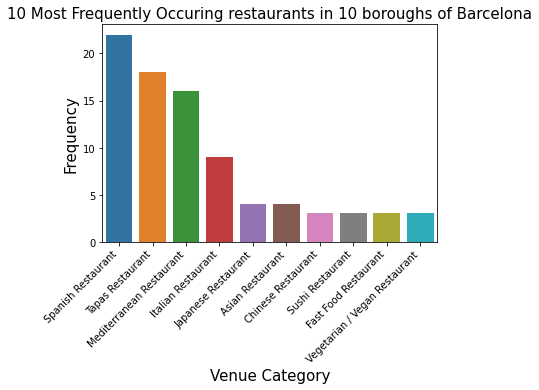

<Figure size 1296x504 with 0 Axes>

In [30]:
# Grpahic of the types of restaurants in Barcelona
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=Barcelona_5_Dist_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring restaurants in 10 boroughs of Barcelona', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()


In [31]:
print ("Shape of the dataframe with Venue Category only Restaurant: ", Barcelona_Venues_only_restaurant.shape)
Barcelona_Venues_only_restaurant.head(10)

Shape of the dataframe with Venue Category only Restaurant:  (106, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Ciutat Vella,41.374985,2.173277,Marea Alta,41.376484,2.175106,Seafood Restaurant
2,Ciutat Vella,41.374985,2.173277,El Pachuco,41.376369,2.169148,Mexican Restaurant
3,Ciutat Vella,41.374985,2.173277,Cañete,41.379154,2.173092,Tapas Restaurant
4,Ciutat Vella,41.374985,2.173277,La Monroe,41.378795,2.170692,Spanish Restaurant
5,Ciutat Vella,41.374985,2.173277,Louro,41.379031,2.174928,Spanish Restaurant
6,Ciutat Vella,41.374985,2.173277,Ófis Restaurant,41.378636,2.170668,Mediterranean Restaurant
7,Ciutat Vella,41.374985,2.173277,Il Mercante di Venezia,41.377403,2.177931,Italian Restaurant
8,Ciutat Vella,41.374985,2.173277,Ultramarinos Santa Mònica,41.378938,2.175166,Tapas Restaurant
9,Eixample,41.393689,2.163655,Vinitus Petit,41.392566,2.165440,Tapas Restaurant
10,Eixample,41.393689,2.163655,9 Reinas,41.394026,2.165005,Argentinian Restaurant


In [32]:
Barcelona_Venues_restaurant = Barcelona_Venues_only_restaurant.groupby(['Borough'])['Venue Category'].apply(lambda x: x[x.str.contains(' Restaurant')].count())

In [33]:
# Let's see how many restaurants are in each borough
Barcelona_Venues_restaurant

Borough
Barri de Gràcia, Barcelona    16
Ciutat Vella                   8
Eixample                      20
Horta - Guinardó               4
Les Corts                     22
Nou Barris                     4
Sant Andreu                   24
Sant Martí                     8
Name: Venue Category, dtype: int64

In [34]:
# There are 2 boroughs without any restaurant (Sants-Montjuïc and Sarrià-St Gervasi)

In [35]:
print('There are {} restaurants in 8 boroughs.'.format(len(Barcelona_Venues_only_restaurant['Venue Category'].str.contains(' Restaurant'))))

There are 106 restaurants in 8 boroughs.


In [36]:
# "One hot encoding" for creating a dataframe of the different restaurants in each borough
Barcelona_onehot = pd.get_dummies(Barcelona_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

Barcelona_onehot['Borough'] = Barcelona_Venues_only_restaurant['Borough'] 

cols=list(Barcelona_onehot.columns.values)
cols.pop(cols.index('Borough'))
Barcelona_onehot=Barcelona_onehot[['Borough']+cols]

Barcelona_onehot.head(15)

,Borough,American Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Polish Restaurant,Russian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant
1,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,Ciutat Vella,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Ciutat Vella,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9,Eixample,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10,Eixample,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
Barcelona_onehot.shape

(106, 27)

In [38]:
# The same dataframe but on a percentage scale
Barcelona_grouped = Barcelona_onehot.groupby('Borough').mean().reset_index()
Barcelona_grouped

,Borough,American Restaurant,Argentinian Restaurant,Asian Restaurant,Chinese Restaurant,Falafel Restaurant,Fast Food Restaurant,German Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Paella Restaurant,Peruvian Restaurant,Polish Restaurant,Russian Restaurant,Seafood Restaurant,South American Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant
0,"Barri de Gràcia, Barcelona",0.000000,0.00,0.062500,0.000000,0.000,0.000,0.000000,0.000,0.062500,0.000000,0.0625,0.062500,0.0625,0.0625,0.0625,0.00,0.000000,0.00,0.000,0.00,0.062500,0.062500,0.375000,0.000000,0.000000,0.062500
1,Ciutat Vella,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.125000,0.000000,0.0000,0.125000,0.1250,0.0000,0.0000,0.00,0.000000,0.00,0.125,0.00,0.250000,0.000000,0.250000,0.000000,0.000000,0.000000
2,Eixample,0.000000,0.05,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.000000,0.050000,0.0000,0.250000,0.0000,0.0000,0.0000,0.05,0.000000,0.05,0.100,0.05,0.150000,0.000000,0.250000,0.000000,0.000000,0.000000
3,Horta - Guinardó,0.000000,0.25,0.000000,0.250000,0.000,0.000,0.000000,0.000,0.000000,0.000000,0.0000,0.250000,0.0000,0.0000,0.0000,0.00,0.000000,0.00,0.000,0.00,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Les Corts,0.000000,0.00,0.045455,0.045455,0.000,0.000,0.000000,0.000,0.090909,0.045455,0.0000,0.136364,0.0000,0.0000,0.0000,0.00,0.045455,0.00,0.000,0.00,0.318182,0.090909,0.045455,0.045455,0.000000,0.090909
5,Nou Barris,0.000000,0.00,0.000000,0.000000,0.000,0.000,0.000000,0.000,0.250000,0.000000,0.0000,0.000000,0.0000,0.0000,0.0000,0.00,0.000000,0.00,0.000,0.00,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Sant Andreu,0.083333,0.00,0.041667,0.041667,0.000,0.125,0.041667,0.000,0.125000,0.083333,0.0000,0.041667,0.0000,0.0000,0.0000,0.00,0.000000,0.00,0.000,0.00,0.208333,0.000000,0.166667,0.000000,0.041667,0.000000
7,Sant Martí,0.000000,0.00,0.125000,0.000000,0.125,0.000,0.000000,0.125,0.125000,0.000000,0.0000,0.500000,0.0000,0.0000,0.0000,0.00,0.000000,0.00,0.000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [39]:
Barcelona_grouped.shape

(8, 27)

In [40]:
# Top 5 types of restaurants and their frequency in each borough
num_top_venues = 5

for hood in Barcelona_grouped['Borough']:
    print("----"+hood+"----")
    temp = Barcelona_grouped[Barcelona_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barri de Gràcia, Barcelona----
                       venue  freq
0           Tapas Restaurant  0.38
1  Middle Eastern Restaurant  0.06
2          Korean Restaurant  0.06
3           Sushi Restaurant  0.06
4         Spanish Restaurant  0.06


----Ciutat Vella----
                      venue  freq
0          Tapas Restaurant  0.25
1        Spanish Restaurant  0.25
2        Italian Restaurant  0.12
3        Seafood Restaurant  0.12
4  Mediterranean Restaurant  0.12


----Eixample----
                      venue  freq
0          Tapas Restaurant  0.25
1  Mediterranean Restaurant  0.25
2        Spanish Restaurant  0.15
3        Seafood Restaurant  0.10
4       Peruvian Restaurant  0.05


----Horta - Guinardó----
                      venue  freq
0        Chinese Restaurant  0.25
1        Spanish Restaurant  0.25
2  Mediterranean Restaurant  0.25
3    Argentinian Restaurant  0.25
4       American Restaurant  0.00


----Les Corts----
                           venue  freq
0             S

In [41]:
# Let's write a function to sort the types of restaurants of each borough in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [42]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = Barcelona_grouped['Borough']

for ind in np.arange(Barcelona_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Barcelona_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head(8)

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Barri de Gràcia, Barcelona",Tapas Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Asian Restaurant,Italian Restaurant
1,Ciutat Vella,Tapas Restaurant,Spanish Restaurant,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
2,Eixample,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Seafood Restaurant,Russian Restaurant
3,Horta - Guinardó,Mediterranean Restaurant,Argentinian Restaurant,Chinese Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant
4,Les Corts,Spanish Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Italian Restaurant
5,Nou Barris,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant
6,Sant Andreu,Spanish Restaurant,Tapas Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant
7,Sant Martí,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant


In [43]:
# Number of clusters
kclusters = 3

Barcelona_grouped_clustering = Barcelona_grouped.drop('Borough', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Barcelona_grouped_clustering)

kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 2, 1, 0], dtype=int32)

In [44]:
# Adding clustering labels and merging dataframes

boroughs_venues_sorted.insert(0, 'Cluster', kmeans.labels_)

barcelona_merged = df

barcelona_merged.rename(columns={'Name':'Borough'}, inplace=True)

barcelona_merged = barcelona_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

boroughs_venues_sorted.head(10)


,Cluster,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,"Barri de Gràcia, Barcelona",Tapas Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Asian Restaurant,Italian Restaurant
1,1,Ciutat Vella,Tapas Restaurant,Spanish Restaurant,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
2,1,Eixample,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Seafood Restaurant,Russian Restaurant
3,0,Horta - Guinardó,Mediterranean Restaurant,Argentinian Restaurant,Chinese Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant
4,1,Les Corts,Spanish Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Italian Restaurant
5,2,Nou Barris,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant
6,1,Sant Andreu,Spanish Restaurant,Tapas Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant
7,0,Sant Martí,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant


In [45]:
barcelona_merged

,Nº,Borough,Area (km2),Population,Density,Neighborhoods,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Ciutat Vella,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet...",41.374985,2.173277,1.0,Tapas Restaurant,Spanish Restaurant,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
1,2,Eixample,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",41.393689,2.163655,1.0,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Seafood Restaurant,Russian Restaurant
2,3,Sants-Montjuïc,2268,184 091,811832,"Poble Sec (11), La Marina del Prat Vermell (12...",41.340234,2.133348,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Les Corts,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20...",41.385244,2.132863,1.0,Spanish Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Italian Restaurant
4,5,Sarrià-Sant Gervasi,1991,149 260,749711,"Vallvidrera, el Tibidabo i les Planes (22), Sa...",41.413039,2.107620,NaN,NaN,NaN,NaN,NaN,NaN
5,6,"Barri de Gràcia, Barcelona",419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ...",41.407653,2.158127,1.0,Tapas Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Asian Restaurant,Italian Restaurant
6,7,Horta - Guinardó,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó...",41.428556,2.143617,0.0,Mediterranean Restaurant,Argentinian Restaurant,Chinese Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant
7,8,Nou Barris,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)...",41.445815,2.179801,2.0,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant
8,9,Sant Andreu,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El...",41.437439,2.196859,1.0,Spanish Restaurant,Tapas Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant
9,10,Sant Martí,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),...",41.406782,2.203655,0.0,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant


In [46]:
# Dropping Sants-Montjuïc and Sarrià-Sant Gervasi of the resulting datafarame as there are not restaurants in the boroughs

barcelona_clusters = barcelona_merged.drop([2, 4], axis=0)

In [47]:
barcelona_clusters

,Nº,Borough,Area (km2),Population,Density,Neighborhoods,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Ciutat Vella,411,103 429,"25 159,09","El Raval (1), Barrio Gótico (2), La Barcelonet...",41.374985,2.173277,1.0,Tapas Restaurant,Spanish Restaurant,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
1,2,Eixample,746,265 910,"35 625,67","El Fort Pienc (5), Sagrada Familia (6), Dreta ...",41.393689,2.163655,1.0,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Seafood Restaurant,Russian Restaurant
3,4,Les Corts,602,81 974,"13 607,11","Les Corts (19), La Maternitat i Sant Ramon (20...",41.385244,2.132863,1.0,Spanish Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Italian Restaurant
5,6,"Barri de Gràcia, Barcelona",419,121 798,"29 082,62","Vallcarca i els Penitents (28), El Coll (29), ...",41.407653,2.158127,1.0,Tapas Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Asian Restaurant,Italian Restaurant
6,7,Horta - Guinardó,1196,171 495,"14 342,64","Baix Guinardó (33), Can Baró (34), El Guinardó...",41.428556,2.143617,0.0,Mediterranean Restaurant,Argentinian Restaurant,Chinese Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant
7,8,Nou Barris,805,170 669,"21 198,48","Vilapicina i La Torre Llobeta (44), Porta (45)...",41.445815,2.179801,2.0,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant
8,9,Sant Andreu,659,149 821,"22 724,25","La Trinitat Vella (57), Baró de Viver (58), El...",41.437439,2.196859,1.0,Spanish Restaurant,Tapas Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant
9,10,Sant Martí,1039,238 315,"22 943,58","El Camp de l'Arpa del Clot (64), El Clot (65),...",41.406782,2.203655,0.0,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant


In [48]:
# Creating map with the different clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(barcelona_clusters['Latitude'], barcelona_clusters['Longitude'], barcelona_clusters['Borough'], barcelona_clusters['Cluster']):
    label = folium.Popup(str(poi) + 'Cluster' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [49]:
# Examining clusters

In [50]:
# Cluster 0

barcelona_clusters.loc[barcelona_clusters['Cluster'] == 0, barcelona_clusters.columns[[1] + list(range(5, barcelona_clusters.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
6,Horta - Guinardó,"Baix Guinardó (33), Can Baró (34), El Guinardó...",41.428556,2.143617,0.0,Mediterranean Restaurant,Argentinian Restaurant,Chinese Restaurant,Spanish Restaurant,Vegetarian / Vegan Restaurant
9,Sant Martí,"El Camp de l'Arpa del Clot (64), El Clot (65),...",41.406782,2.203655,0.0,Mediterranean Restaurant,Asian Restaurant,Falafel Restaurant,Indian Restaurant,Italian Restaurant


In [51]:
# Cluster 1

barcelona_clusters.loc[barcelona_clusters['Cluster'] == 1, barcelona_clusters.columns[[1] + list(range(5, barcelona_clusters.shape[1]))]]

,Borough,Neighborhoods,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ciutat Vella,"El Raval (1), Barrio Gótico (2), La Barcelonet...",41.374985,2.173277,1.0,Tapas Restaurant,Spanish Restaurant,Mexican Restaurant,Seafood Restaurant,Italian Restaurant
1,Eixample,"El Fort Pienc (5), Sagrada Familia (6), Dreta ...",41.393689,2.163655,1.0,Mediterranean Restaurant,Tapas Restaurant,Spanish Restaurant,Seafood Restaurant,Russian Restaurant
3,Les Corts,"Les Corts (19), La Maternitat i Sant Ramon (20...",41.385244,2.132863,1.0,Spanish Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Italian Restaurant
5,"Barri de Gràcia, Barcelona","Vallcarca i els Penitents (28), El Coll (29), ...",41.407653,2.158127,1.0,Tapas Restaurant,Vegetarian / Vegan Restaurant,Paella Restaurant,Asian Restaurant,Italian Restaurant
8,Sant Andreu,"La Trinitat Vella (57), Baró de Viver (58), El...",41.437439,2.196859,1.0,Spanish Restaurant,Tapas Restaurant,Fast Food Restaurant,Italian Restaurant,American Restaurant


In [52]:
# Cluster 2

barcelona_clusters.loc[barcelona_clusters['Cluster'] == 2, barcelona_clusters.columns[[1] + list(range(5, barcelona_clusters.shape[1]))]]

# Cluster 2 has the largest rate of non-spanish restaurants, with a lot of asian restaurants 

,Borough,Neighborhoods,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
7,Nou Barris,"Vilapicina i La Torre Llobeta (44), Porta (45)...",41.445815,2.179801,2.0,Spanish Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Mediterranean Restaurant,Argentinian Restaurant


In [53]:
# Importing data of commercial establishment crime in Barcelona 

df2 = pd.read_html('https://www.bcn.cat/estadistica/castella/dades/anuaris/anuari97/cap08/A0803017.htm')[0]

In [54]:
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional,3. Policía Nacional
1,"document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images..."
2,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos,3.1. Tipos de delitos por distritos
3,"document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images..."
4,Tipus delictes,Tipus delictes,TOTAL,1.Ciutat Vella,2.Eixample,3.Sants- Montjuïc,4.Les Corts,5.Sarrià- S.Gervasi,6.Gràcia,7.Horta- Guinardó,8.Nou Barris,9.Sant Andreu,10.Sant Martí
5,"document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images...","document.write('<img src=""' + whpath + 'images..."
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TOTAL,TOTAL,30.842,3.172,6.115,3.945,1.955,2.954,1.775,2.137,2.331,2.245,4.213
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Atracaments a bancs,Atracaments a bancs,109,5,25,4,10,17,10,1,8,18,11


In [55]:
# Cleaning the dataframe

df2.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 13, 14, 15, 16, 17, 18, 19, 20, 21], axis=0, inplace=True)
df2.drop([1,2], axis=1, inplace=True)

In [56]:
df2

,0,3,4,5,6,7,8,9,10,11,12
10,Atracaments a establiments,18,114,40,25,52,30,28,20,27,42
11,Robatori en establiment,363,813,531,159,336,239,283,248,323,647
12,Robatori amb intimidació en establiment,89,394,153,97,167,146,123,138,181,181


In [57]:
# Renaming columns

df2.rename(columns={df2.columns[0]:"Crime"}, inplace=True)
df2.rename(columns={df2.columns[1]:"Ciutat Vella"}, inplace=True)
df2.rename(columns={df2.columns[2]:"Eixample"}, inplace=True)
df2.rename(columns={df2.columns[3]:"Sants-Montjuïc"}, inplace=True)
df2.rename(columns={df2.columns[4]:"Les Corts"}, inplace=True)
df2.rename(columns={df2.columns[5]:"Sarrià-S.Gervasi"}, inplace=True)
df2.rename(columns={df2.columns[6]:"Gràcia"}, inplace=True)
df2.rename(columns={df2.columns[7]:"Horta-Guinardó"}, inplace=True)
df2.rename(columns={df2.columns[8]:"Nou Barris"}, inplace=True)
df2.rename(columns={df2.columns[9]:"Sant Andreu"}, inplace=True)
df2.rename(columns={df2.columns[10]:"Sant Martí"}, inplace=True)

In [58]:
# Renaming rows

df2['Crime'] = df2['Crime'].replace(['Atracaments a establiments'],'Robbery in commercial establishment')
df2['Crime'] = df2['Crime'].replace(['Robatori en establiment'],'Shoplifting in commercial establishment')
df2['Crime'] = df2['Crime'].replace(['Robatori amb intimidació en establiment'],'Shoplifting with intimidation in commercial establishment')

In [59]:
df2

,Crime,Ciutat Vella,Eixample,Sants-Montjuïc,Les Corts,Sarrià-S.Gervasi,Gràcia,Horta-Guinardó,Nou Barris,Sant Andreu,Sant Martí
10,Robbery in commercial establishment,18,114,40,25,52,30,28,20,27,42
11,Shoplifting in commercial establishment,363,813,531,159,336,239,283,248,323,647
12,Shoplifting with intimidation in commercial es...,89,394,153,97,167,146,123,138,181,181


In [60]:
# Considering that robbery is the crime which we give the most importance, we are going to order the data according to that first row

df2 = df2.sort_values(by=10, ascending=False, axis=1)


In [61]:
df2

,Crime,Sarrià-S.Gervasi,Sant Martí,Sants-Montjuïc,Gràcia,Horta-Guinardó,Sant Andreu,Les Corts,Nou Barris,Ciutat Vella,Eixample
10,Robbery in commercial establishment,52,42,40,30,28,27,25,20,18,114
11,Shoplifting in commercial establishment,336,647,531,239,283,323,159,248,363,813
12,Shoplifting with intimidation in commercial es...,167,181,153,146,123,181,97,138,89,394


In [62]:
# Eixample is the borough with the most robberies but it's placed as the last element of the dataframe, that's a mistake so let's fix it

df2 = df2[['Crime', 'Eixample', 'Sarrià-S.Gervasi', 'Sant Martí', 'Sants-Montjuïc', 'Gràcia', 'Horta-Guinardó', 'Sant Andreu', 'Les Corts', 'Nou Barris', 'Ciutat Vella']]


In [63]:
df2

,Crime,Eixample,Sarrià-S.Gervasi,Sant Martí,Sants-Montjuïc,Gràcia,Horta-Guinardó,Sant Andreu,Les Corts,Nou Barris,Ciutat Vella
10,Robbery in commercial establishment,114,52,42,40,30,28,27,25,20,18
11,Shoplifting in commercial establishment,813,336,647,531,239,283,323,159,248,363
12,Shoplifting with intimidation in commercial es...,394,167,181,153,146,123,181,97,138,89


In [64]:
# With the data sorted correctly we can affirm that Eixample is the most insecure borough for openning a restaurant, followed by Sarrià-S.Gervasi

In [65]:
# Importing data of cost of square meter in Barcelona 

df3 = pd.read_html('https://www.bankinter.com/blog/mercados/precio-vivienda-barcelona-distritos')[0]

In [66]:
df3

,Barcelona Distritos,Var. media 2019,Precio por m2,Esfuerzo financiero (Renta Neta)
0,Sarriá-San Gervasi,"4,5%",4.753,"33,5%"
1,Les Corts,"3,6%",4.258,"33,8%"
2,Ensanche,"2,8%",4.069,"26,8%"
3,Gracia,"4,1%",3.882,"27,1%"
4,Ciutat Vella,"-0,4%",3.753,"27,4%"
5,Sants - Monjuic,"0,1%",3.305,"22,4%"
6,Sant Martí,"2,3%",3.213,"23,8%"
7,Horta-Guinardó,"1,6%",2.934,"22,1%"
8,Sant Andreu,"6,1%",2.923,"24,4%"
9,Nou Barris,"2,5%",2.391,"21,7%"


In [67]:
# Cleaning the dataframe

del(df3['Var. media 2019'])
del(df3['Esfuerzo financiero (Renta Neta)'])


In [68]:
df3

,Barcelona Distritos,Precio por m2
0,Sarriá-San Gervasi,4.753
1,Les Corts,4.258
2,Ensanche,4.069
3,Gracia,3.882
4,Ciutat Vella,3.753
5,Sants - Monjuic,3.305
6,Sant Martí,3.213
7,Horta-Guinardó,2.934
8,Sant Andreu,2.923
9,Nou Barris,2.391


In [69]:
# Renaming

df3.rename(columns={df3.columns[0]:"Borough"}, inplace=True)
df3.rename(columns={df3.columns[1]:"Price per m2"}, inplace=True)
df3['Borough'] = df3['Borough'].replace(['Ensanche'],'Eixample')

In [70]:
df3

,Borough,Price per m2
0,Sarriá-San Gervasi,4.753
1,Les Corts,4.258
2,Eixample,4.069
3,Gracia,3.882
4,Ciutat Vella,3.753
5,Sants - Monjuic,3.305
6,Sant Martí,3.213
7,Horta-Guinardó,2.934
8,Sant Andreu,2.923
9,Nou Barris,2.391


In [71]:
# With this data we can affirm that Sarrià-San Gervasi has the highest price per square meter, followed by Les Corts

In [72]:
# Conclusions: 
#     - Sant Martí is the borough with the most asian restaurants, followed by Gràcia. Both belong to cluster one (1)
#     - The borough with the most criminality is Eixample, followed by Sarrià-S.Gervasi and Sant Martí
#     - The borough with the highest cost of square meter in Barcelona is Sarrià-S.Gervasi, followed by Les Corts and Eixample

In [73]:
# With all this data, we can create different scenarios:
#     - If we want to undertake our business in a borough without high criminality, we will exclude Eixample, Sarrià-S.Gervasi and Sant Martí of our candidates
#     - If we can't afford to pay a higher price for square meter, we will exclude Sarrià-S.Gervasi, Les Corts and Eixample
#     - If we want to undertake the restaurant in a borough with some asian restaurants, we will opt for cluster number one (that means boroughs Sant Martí and Gràcia)